### ASK Modulation and Demodulation
#### Theory
ASK (Amplitude Shift Keying) is a fundamental digital modulation technique in which the amplitude of a high-frequency carrier wave is varied in proportion to the binary data being transmitted. In this method, the carrier signal is present for a binary '1' and absent (or at a lower amplitude) for a binary '0'. This technique is simple to implement and widely used in low-bandwidth communication systems. However, it is susceptible to noise and interference, which can affect the accuracy of data transmission.

#### Objective:
- To understand the concept of ASK modulation and demodulation.
- To implement ASK modulation and demodulation using Python.
- To visualize the digital signal, modulated signal, and demodulated signal.

In [263]:
import numpy as np
from matplotlib import pyplot as plt

In [264]:
def unipolar_nrz(data, sampling_rate: int = 100, duration: float = 1.0):
    time = np.arange(0, len(data) * duration, duration / sampling_rate)
    signal = np.zeros_like(time)
    for i, bit in enumerate(data):
        start = int(i  * sampling_rate)
        end = int((i + 1) * sampling_rate)
        signal[start: end] = bit
    return time, signal

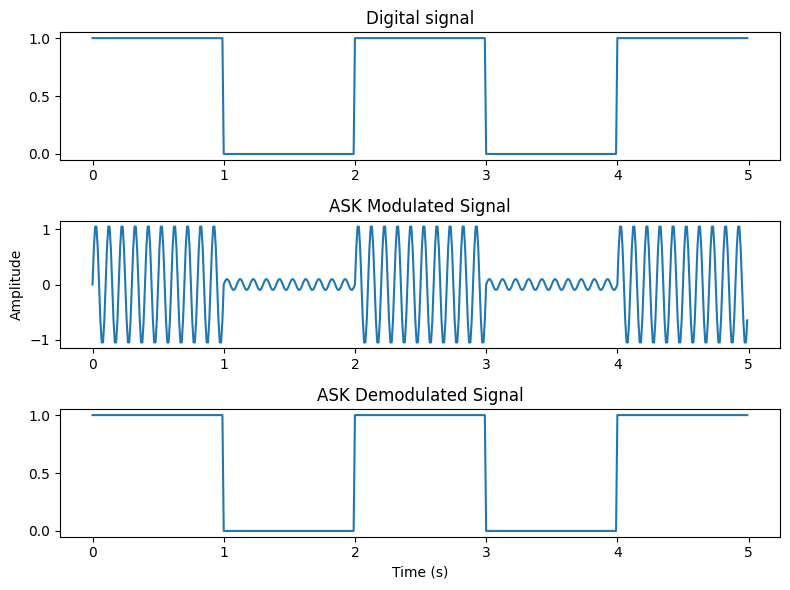

In [265]:
data = np.random.randint(0, 2, 5)
time, dsignal = unipolar_nrz(data, 100, 1)
asignal = np.sin(2 * np.pi * 10 * time)
shifted_dsignal = dsignal + 0.1
modulated_signal = asignal * shifted_dsignal
demodulated_signal = np.zeros_like(dsignal)

for i in range(0, len(modulated_signal), 100):
    mean = np.mean(np.abs(modulated_signal[i:i+100]))
    demodulated_signal[i: i+100] = 1 if mean>0.3 else 0

plt.figure(figsize=(8, 6))
plt.subplot(3, 1, 1)
plt.plot(time, dsignal)
plt.title("Digital signal")

plt.subplot(3, 1, 2)
plt.plot(time, modulated_signal)
plt.title("ASK Modulated Signal")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(time, demodulated_signal)
plt.title("ASK Demodulated Signal")
plt.xlabel("Time (s)")

plt.tight_layout()